*** Vasiliy Mosin ***

# Seminar 1 (Linear models, Optimization)

In this seminar you will implement a simple linear classifier using numpy and your brain.

## Two-dimensional classification

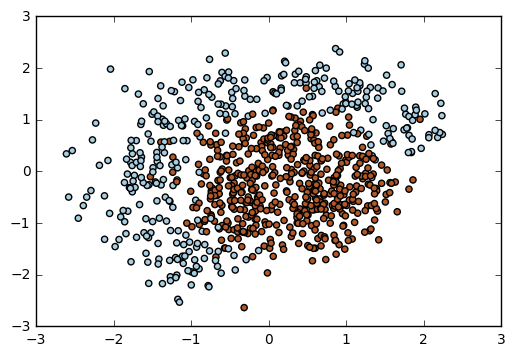

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
from sklearn import datasets, preprocessing

(X, y) = datasets.make_circles(n_samples=1024, shuffle=True, noise=0.2, factor=0.4)
ind = np.logical_or(y==1, X[:,1] > X[:,0] - 0.5)
X = X[ind,:]
m = np.array([[1, 1], [-2, 1]])
X = preprocessing.scale(X)
y = y[ind]
y = 2*y - 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

In [3]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def visualize(X, y, w, loss, n_iter):
    plt.clf()
    Z = classify(np.c_[xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())

**Your task starts here**

Implement classification with hinge loss.
You should use up to the second order terms of X for your classifier, as provided by function **expand**.

In [4]:
def expand(X):
    X_ = np.zeros((X.shape[0], 6))
    X_[:,0:2] = X
    X_[:,2:4] = X**2
    X_[:,4] = X[:,0] * X[:,1]
    X_[:,5] = 1
    return X_

def classify(X, w):
    dotproduct = expand(X).dot(w)
    return np.sign(dotproduct)

def compute_loss(X, y, w):
    dotproduct = expand(X).dot(w)
    margin = dotproduct * y
    #warning, np.maximum is not same as np.max, read the description!
    hinge = np.maximum(0,1-margin)
    return np.mean(hinge)
    
def compute_grad(X, y, w):
    X_exp = expand(X)
    dotproduct = X_exp.dot(w)
    margin = dotproduct * y    
    # if True, gradient is zero. (where hinge loss equals 0)
    is_zero =  1 - margin  <= 0
    #gradients for each sample of shape [n_samples, n_features]
    #margin = X*w * y , derivative of margin over W = X*y
    #derivative of max(1-margin,0) is -margin if 1-margin>0, else 0
    grad_term = -(X_exp*y[:,None]) * (~is_zero[:,None])
    #                     ^-- [:,None] transforms vector of [samples] into
    #                          a column-matrix [samples,1] in order for numpy
    #                          to multiply it over X_exp by broadcasting.
    #sum over samples batch
    return grad_term.sum(axis=0)

Find an optimal learning rate for gradient descent for given batch size. 
You can see the example of correct output below this cell before you run it.

**Don't change the batch size!**

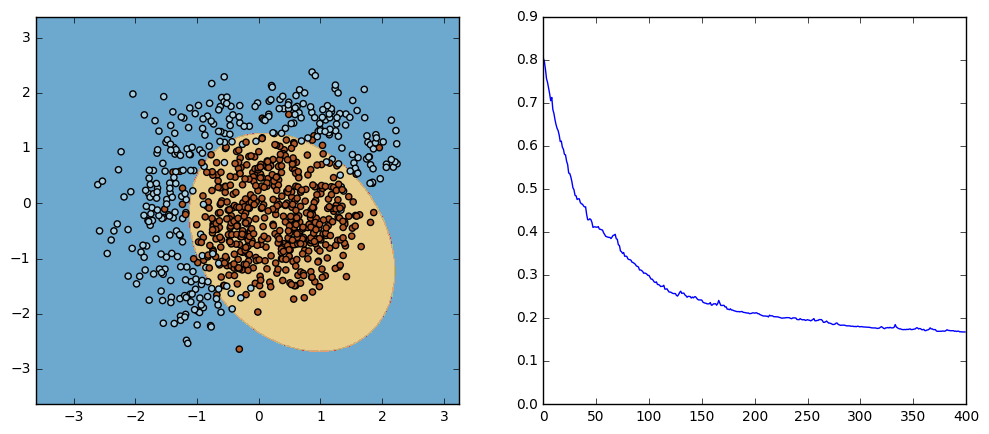

In [34]:
w = np.array([1,0,0,0,0,0])

alpha = 0.01 # learning rate

n_iter = 400
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    w = w - alpha * compute_grad(X[ind,:], y[ind], w)

visualize(X, y, w, loss, n_iter)
plt.clf()

Implement gradient descent with momentum and test it's performance for different learning rate and momentum values.

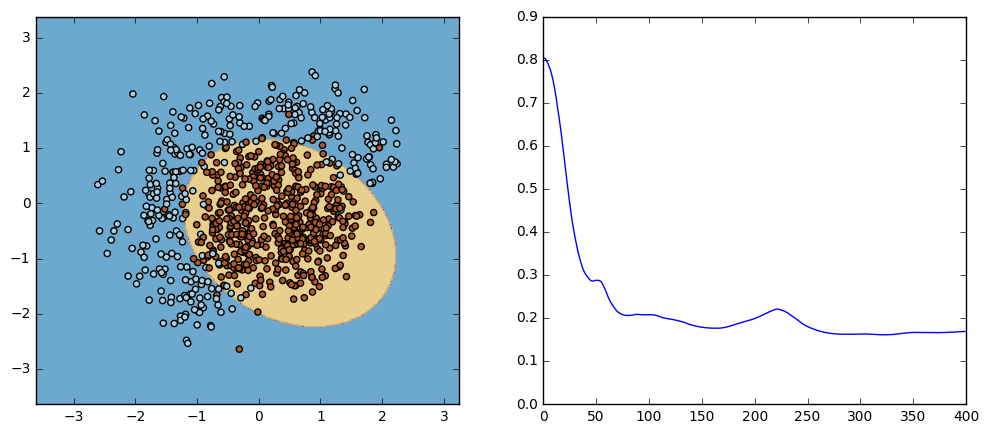

In [33]:
w = np.array([1,0,0,0,0,0])

alpha = 0.001 # learning rate
mu    = 0.99 # momentum
dw    = 0 # previous update

n_iter = 400
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    dw = alpha * compute_grad(X[ind,:], y[ind], w) + mu * dw
    w = w - dw

visualize(X, y, w, loss, n_iter)
plt.clf()

Implement RMSPROP algorithm


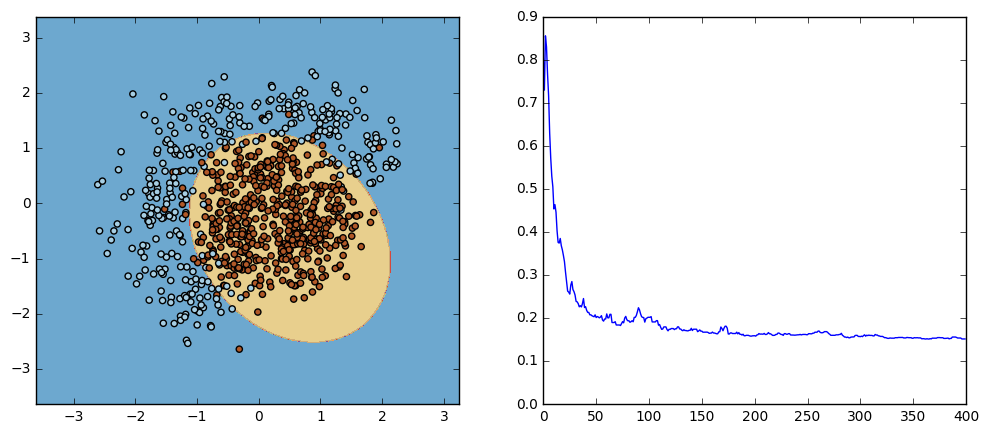

In [32]:
w = np.array([1,0,0,0,0,0])

alpha = 0.01 # learning rate
gamma = 0.999 # decay rate
v     = np.zeros(6) # moving average
eps   = 0.00000001 # to avoid division by zero

n_iter = 400
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    grad = compute_grad(X[ind,:], y[ind], w)
    v = gamma * v + (1 - gamma) * grad**2
    w = w - alpha * grad / (np.sqrt(v) + eps)

visualize(X, y, w, loss, n_iter)
plt.clf()

Which optimization method do you consider the best? Type your answer in the cell below

After performing some number of tests the following was discovered:
1. The best learning rate for gradient descent algorithm is 0.01 in our case. However, it takes too much time for converging and even 400 epochs are not enough to reach the minimum of the loss function.
2. The best parameters for gradient descent with momentum algorithm on our data are learning rate 0.001 and momentum 0.99. It has very smooth training curve and performs better than the first algorithm. Besides, it goes faster at the beggining.
3. The best parameters for RMSPROP algorithm are learning rate 0.01 and decay rate 0.999. Although, it has rough training curve, this algorithm actually is the best one comparing to the first two. It goes very fast at the beggining and reaches the minimum of the loss at 300 epochs.

# Bonus quest 
try the same thing for Adagrad and anything else you find suitable

Adagrad.

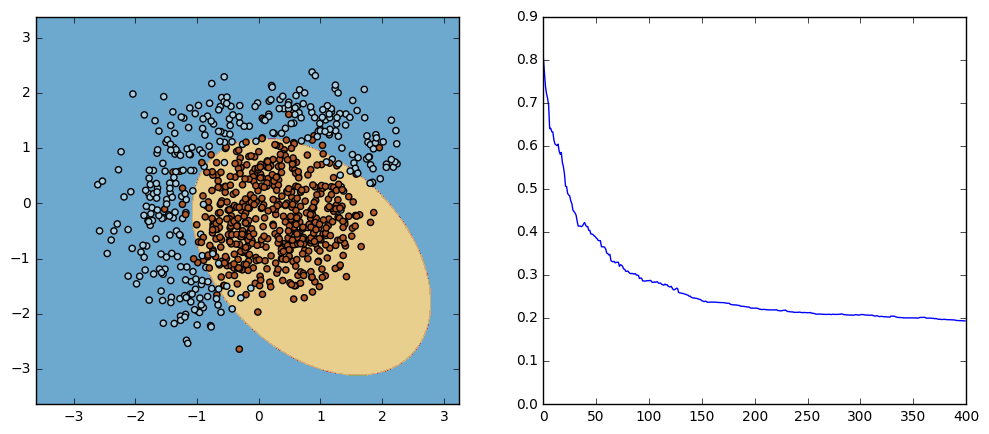

In [36]:
w = np.array([1,0,0,0,0,0])

alpha = 0.1 # learning rate
G     = np.zeros(6) # gradient accumulator
eps   = 0.00000001 # to avoid division by zero

n_iter = 400
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    grad = compute_grad(X[ind,:], y[ind], w)
    G = G + grad**2
    w = w - alpha * grad / (np.sqrt(G) + eps)

visualize(X, y, w, loss, n_iter)
plt.clf()

Adam.

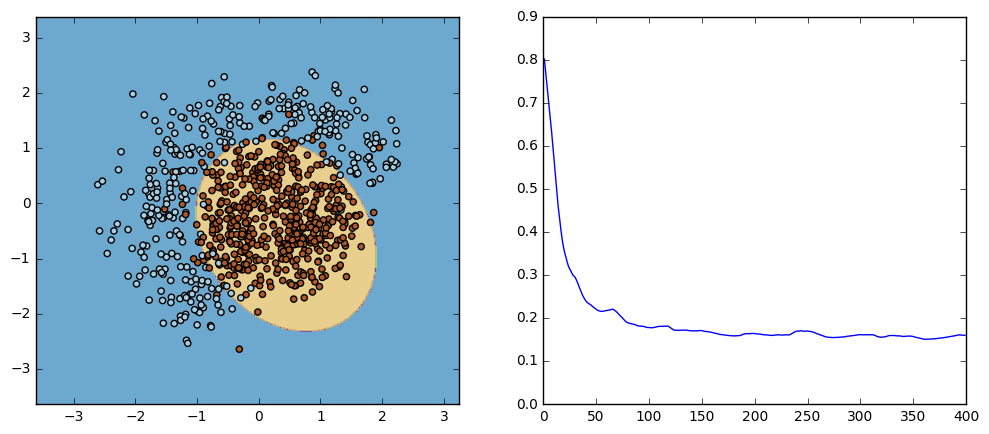

In [35]:
w = np.array([1,0,0,0,0,0])

alpha = 0.01 # learning rate
beta1 = 0.9
beta2 = 0.999
m     = 0
v     = 0
eps   = 0.00000001 # to avoid division by zero

n_iter = 400
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    grad = compute_grad(X[ind,:], y[ind], w)
    m = beta1*m + (1-beta1)*grad
    v = beta2*v + (1-beta2)*(grad**2)
    w = w - alpha * m / (np.sqrt(v) + eps)

visualize(X, y, w, loss, n_iter)
plt.clf()

Additionally, Adagrad and Adam algorithms were implemented in this homework. Adagrad with learning rate 0.1 works not much better than the standart gradient descent on our data. It only maybe goes faster at the beggining. In conrast, Adam algorithm works very well on our data. Alike gradient descent with momentum, it has very smooth training curve. Also, it goes very fast at the beggining and starts fluctuate around the loss minimum from 150th epoch.